# Webscraping Data and Data Analysis

#### Importing the required packages

In [2]:
import requests #getting the html page
from bs4 import BeautifulSoup #reading html
import pandas as pd #dataframe
from selenium.webdriver import Firefox #automation
from time import sleep 
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

## 1) Webscrapping

### JIOMART

In [28]:
path = 'C:/geckodriver.exe'
driver = Firefox(executable_path= path) #opens a firefox webdriver
url = 'https://www.jiomart.com/c/groceries/staples/13'
driver.get(url)

In [30]:
url = 'https://www.jiomart.com/c/groceries/staples/13'
driver.get(url)

#### Scraping items from the 'Staples' category.

In [31]:
#initializing lists
category = []
subcat=[]
name = []
sellprice=[]
costprice=[]
disc = []
brand = []
for i in range(8): #there are 8 subcategories
    # subc = driver.find_element_by_xpath('/html/body/div[1]/main/div[2]/div[1]/div[1]/ul/li[3]/ul/li[%d]/a' %(i+1)).text
    # # print(subc)
    driver.find_element_by_xpath('/html/body/div[1]/main/div[2]/div[1]/div[1]/ul/li[3]/ul/li[%d]/a' %(i+1)).click() #clicks on the subcategory
    sleep(5)
    r = requests.get(driver.current_url) #reads the url data
    # print(driver.current_url)
    soup = BeautifulSoup(r.text,'html5lib') #parses the data
    for items in soup.find_all('div',attrs= {'class':'cat-item'}): #finds all the products on the page
        category.append(items.find('input',attrs = {'class':'data-cate'})['value']) #category
        subcat.append(items.find('input',attrs= {'class':'data-subcate'})['value']) #sub category
        brand.append(items.find('span',attrs={'class':'drug-varients ellipsis'}).text) #brand
        name.append(items.find('span',attrs = {'class':'clsgetname'}).text) #name
        try:
            sellprice.append(float(items.find('span',attrs = {'id':'final_price'}).text.replace('₹',''))) #sellprice in float form
        except: #in case the number has commas
            sp = items.find('span',attrs = {'id':'final_price'}).text.replace('₹','')
            sp = sp.replace(',','') #removes commas
            sellprice.append(float(sp))
        try:
            costprice.append(float(items.find('strike',attrs = {'id':'price'}).text.replace('₹',''))) #cost in float
        except: #in case the number has commas
            cp = items.find('span',attrs = {'id':'final_price'}).text.replace('₹','')
            cp = sp.replace(',','') #removes commas
            costprice.append(float(cp))    
        disc.append(int(items.find('span',attrs={'class':'dis_section'}).text.replace('% OFF',''))) #discount in integer
#     driver.find_element_by_xpath('/html/body/div[1]/main/div[2]/div[1]/div[1]/ul/li[3]/a').click() #to open the subcat menu again
    driver.find_element_by_xpath('/html/body/div[1]/main/div[1]/ul/li[4]/a').click() #to go back to the staples page
    sleep(5)

##### The data from Jiomart is stored in jiomart_staples

In [32]:
jiomart_staples = pd.DataFrame({'category':category,'subcategory':subcat,'brand':brand,'name':name,'MRP':costprice,'SP':sellprice,'discount':disc})

### HAPPY ORDER

In [33]:
url_happyorder = 'https://www.happyorder.in/happy-order-93526/products?cat=grocery-oil-7-masala-28193'
driver.get(url_happyorder)  

#### Scraping items from 'Staples and Groceries' category

In [34]:
#initializing lists
category = []
subcat=[]
name = []
sellprice=[]
costprice=[]
disc = []
brand = []
for i in range(8): #8 subcategories
    subc = driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[1]/div/div/div/div/div/div/label[%d]/span[2]' %(i+2)).text #stores the subcategory
    # print(subc)
    driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[1]/div/div/div/div/div/div/label[%d]/span[1]/span[1]/input' %(i+2)).click() #selects a subcategory 
    sleep(5)
    no_results = int(driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[1]/div[1]/p[2]/span').text.replace('Products','')) #no of results in a sub category
    if no_results > 20:
        no_results = 20 #since 20 items per category are taken in jiomart
    for j in range(no_results): #looping through every item
        try:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        except: #incase the webpage takes more time to load the entire page
            sleep(10)
        item = driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[3]/div/div[1]/div[%d]/div/div/a/p' %(j+1)).text
        try: 
            sp = int(driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[3]/div/div[1]/div[%d]/div/div/a/div/p[1]/span[2]' %(j+1)).text)
        except: #in case there are commas
            sp = driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[3]/div/div[1]/div[%d]/div/div/a/div/p[1]/span[2]' %(j+1)).text
            sp = sp.replace(',','')  #removes commas
            sp = int(sp)
        try:
            try:
                mrp = int(driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[3]/div/div[1]/div[%d]/div/div/a/div/s/span[2]' %(j+1)).text)
            except: #in case there are commas
                mrp = driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[3]/div/div[1]/div[%d]/div/div/a/div/s/span[2]' %(j+1)).text
                mrp = mrp.replace(',','') #removes commas
                mrp = int(mrp)
            dis = int(driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[2]/div[3]/div/div[1]/div[%d]/div/div/a/div/p[2]' %(j+1)).text.replace('% off',""))
        except: #in case there are no discounts 
            mrp = sp 
            dis = 0
        category.append('Staples') #category is Staples for all items
        subcat.append(subc) #subcategory 
        brand.append('N/A') #brand cannot be found via HTML elements 
        name.append(item) #name
        sellprice.append(sp) #sellprice
        costprice.append(mrp) #costprice
        disc.append(dis) #discounts
        # print(item)
    driver.find_element_by_xpath('/html/body/div/div/div[1]/div/div[2]/div[1]/div/div/div/div/div/div/label[%d]/span[1]/span[1]/input' %(i+2)).click() #unselects the selected subcategory


##### The data from Happy Order is saved in 'happyorder_staples'

In [35]:
happyorder_staples = pd.DataFrame({'category':category,'subcategory':subcat,'brand':brand,'name':name,'MRP':costprice,'SP':sellprice,'discount':disc})

## Data Analysis

In [36]:
happyorder_staples.head()

,category,subcategory,brand,name,MRP,SP,discount
0,Staples,Atta & Other flours,N/A,Aashirvaad Atta -Whole Wheat - 5 Kg,213,170,20
1,Staples,Atta & Other flours,N/A,Aashirvaad Atta Select - Sharbati - 5 Kg,285,245,14
2,Staples,Atta & Other flours,N/A,Aashirvaad Atta - Multigrains - 5 Kg,310,279,10
3,Staples,Atta & Other flours,N/A,Tata Sampann Besan - Low oil Absorb - 500 Grm,62,60,3
4,Staples,Atta & Other flours,N/A,Patanjali Wheat Dalia - 500 Gms,35,35,0


In [37]:
jiomart_staples.head()

,category,subcategory,brand,name,MRP,SP,discount
0,Staples,"Atta, Flours & Sooji",PRIVATE LABEL,Atta Dal Rice Combo - Chakki Atta 5 kg + Toor ...,600.0,471.00,21
1,Staples,"Atta, Flours & Sooji",AASHIRVAAD,Aashirvaad Whole Wheat Atta 1 kg,52.0,48.36,7
2,Staples,"Atta, Flours & Sooji",GOOD LIFE,Good Life MP Wheat Chakki Atta 1 kg,50.0,39.00,22
3,Staples,"Atta, Flours & Sooji",NATURE FRESH,Nature Fresh Sampoorna Chakki Whole Wheat Atta...,450.0,345.00,23
4,Staples,"Atta, Flours & Sooji",UTTAM,Uttam Rawa / Sooji 1 kg,60.0,49.00,18


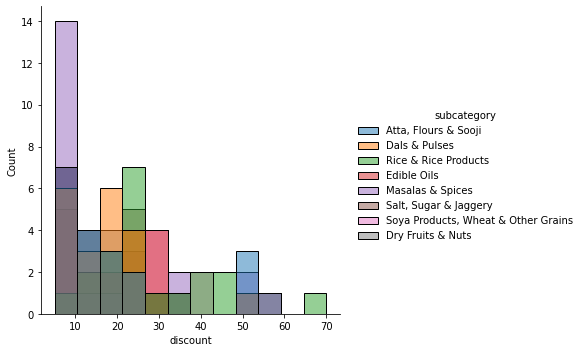

In [38]:
sns.displot(data = jiomart_staples,x = 'discount', hue = 'subcategory')

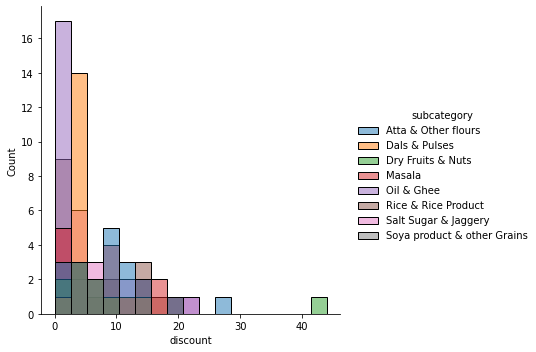

In [39]:
sns.displot(data = happyorder_staples, x = 'discount', hue = 'subcategory')

Text(0.5, 1.0, 'Histogram of the Discounts')

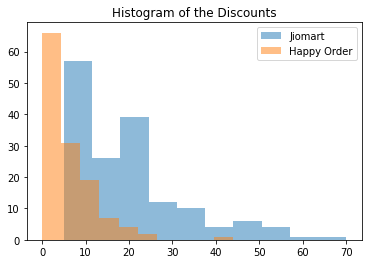

In [40]:
plt.hist(jiomart_staples['discount'],alpha = 0.5, label = 'Jiomart')
plt.hist(happyorder_staples['discount'],alpha = 0.5,label = 'Happy Order')
plt.legend(loc = 'upper right')
plt.title('Histogram of the Discounts')

In [41]:
jiomart_staples.groupby('subcategory').discount.describe()

,count,mean,std,min,25%,50%,75%,max
subcategory,,,,,,,,
"Atta, Flours & Sooji",20.0,20.90,17.591565,7.0,7.00,14.0,22.25,55.0
Dals & Pulses,20.0,16.70,10.120849,5.0,7.75,16.5,21.25,50.0
Dry Fruits & Nuts,20.0,15.25,7.906526,7.0,7.00,14.0,20.50,34.0
Edible Oils,20.0,18.90,13.246251,6.0,7.00,16.0,25.50,58.0
Masalas & Spices,20.0,16.30,13.830173,7.0,9.25,10.0,16.25,50.0
Rice & Rice Products,20.0,28.55,14.376424,9.0,20.00,24.0,35.50,70.0
"Salt, Sugar & Jaggery",20.0,19.35,10.883474,7.0,11.50,19.0,25.00,50.0
"Soya Products, Wheat & Other Grains",20.0,20.05,11.988920,7.0,7.75,19.5,29.00,42.0


In [42]:
happyorder_staples.groupby('subcategory').discount.describe()

,count,mean,std,min,25%,50%,75%,max
subcategory,,,,,,,,
Atta & Other flours,20.0,8.900000,6.373465,0.0,4.75,8.5,11.25,26.0
Dals & Pulses,20.0,5.100000,3.127131,1.0,3.00,4.0,5.25,14.0
Dry Fruits & Nuts,9.0,8.666667,13.453624,1.0,3.00,4.0,7.00,44.0
Masala,20.0,7.800000,6.228965,0.0,3.00,7.5,12.25,19.0
Oil & Ghee,20.0,2.150000,4.556950,0.0,0.00,1.0,2.00,21.0
Rice & Rice Product,20.0,6.200000,6.169535,0.0,1.00,5.0,10.00,20.0
Salt Sugar & Jaggery,18.0,5.500000,5.490634,0.0,2.25,5.0,6.75,22.0
Soya product & other Grains,3.0,4.000000,3.464102,2.0,2.00,2.0,5.00,8.0


### BoxPlot and swarmplot of Discounts and the different Categories in JioMart

Text(0.5, 1.0, 'Happy Order')

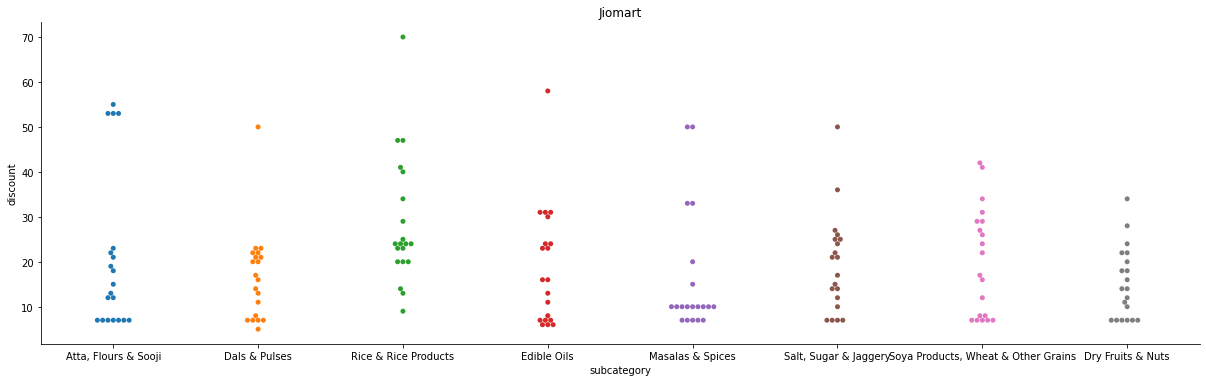

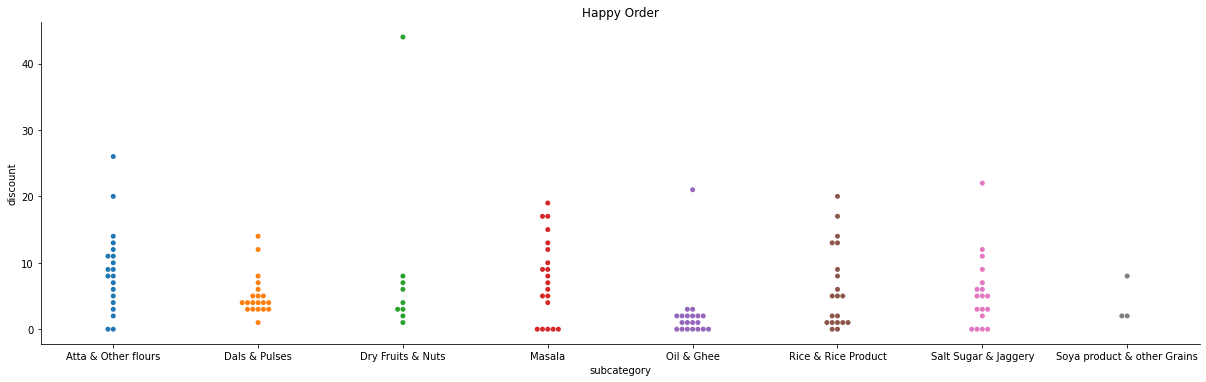

In [43]:
g = sns.catplot( x = 'subcategory', y = 'discount', data = jiomart_staples,kind = 'swarm',aspect= 5/1.5)
g.ax.set_title('Jiomart')
g = sns.catplot( x = 'subcategory', y = 'discount', data = happyorder_staples,kind = 'swarm',aspect= 5/1.5)
g.ax.set_title('Happy Order')

##### Jiomart's swarm plot is more dense through the discount range which not only implies that it offers more number of discounts, it also offers a high discount on the products sold there. Most of the discounts on Jiomart are in the range of 10-30/40 percent, while the discounts on Happy Order are in the range of 0 - 10/15 percent

Text(0.5, 1.0, 'HAPPY ORDER')

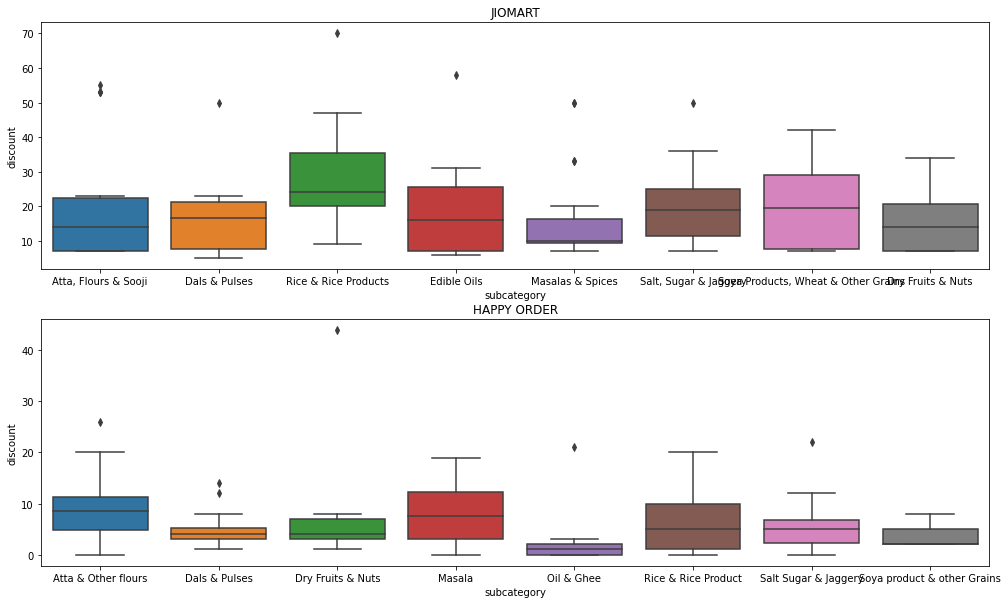

In [44]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(17,10))
sns.boxplot(x=jiomart_staples['subcategory'],y=jiomart_staples['discount'],ax = ax1)
ax1.set_title('JIOMART')
sns.boxplot(x=happyorder_staples['subcategory'],y=happyorder_staples['discount'],ax = ax2)
ax2.set_title('HAPPY ORDER')


### Scatterplots of Selling Price vs Cost Price

Text(0.5, 1.0, 'Happy Order')

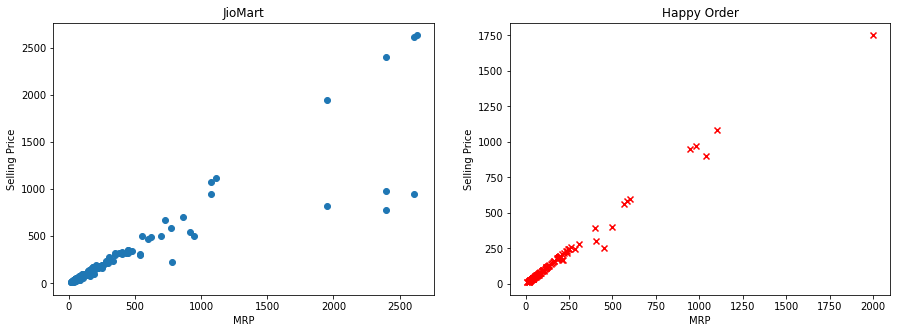

In [45]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
# fig = plt.figure(figsize=(1,20))
ax1.scatter(jiomart_staples['MRP'],jiomart_staples['SP'])
# ax1 = sns.scatterplot(x = jiomart_staples['MRP'],y=jiomart_staples['SP'],hue=jiomart_staples['subcategory'])
ax1.set(xlabel = 'MRP',ylabel = 'Selling Price')
ax1.set_title('JioMart')
ax2.scatter(happyorder_staples['MRP'],happyorder_staples['SP'],color = 'red',marker = 'x')
ax2.set(xlabel = 'MRP',ylabel = 'Selling Price')
ax2.set_title('Happy Order')

##### Jiomart's scatterplot is more scattered, as compared to the Happy Order's scatterplot, implying jiomart gives a higher number of discounts. Also, there are some points on the right hand side of the plot which implies that jiomart offers a good discount on expensive items.

### Scatterplot with Hues

Text(0.5, 0.98, 'Scatter Plot of SP vs MRP')

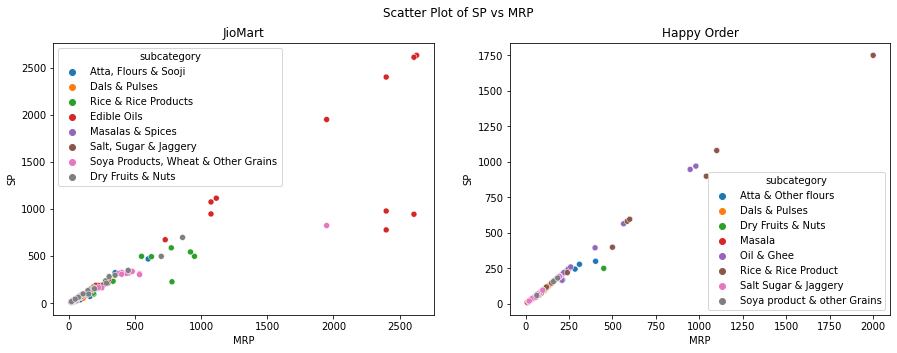

In [46]:
fig2, (ax3,ax4) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(ax= ax3, x = jiomart_staples['MRP'],y=jiomart_staples['SP'],hue=jiomart_staples['subcategory'])
ax3.set_title('JioMart')
sns.scatterplot(ax = ax4,x = happyorder_staples['MRP'],y=happyorder_staples['SP'],hue=happyorder_staples['subcategory'])
ax4.set_title('Happy Order')
plt.suptitle('Scatter Plot of SP vs MRP')

##### Jiomart sells most of its Atta, Masala, Salt, Dals, Dry Fruits near cost price, but sells its Edible Oils, Some soya products and Rice at a discount. 
##### Happy Orders sells most of the products near cost price, with some discounts on Dry Fruits and Rice products.

## Scatterplot of Discounts vs MRP with hues

Text(0.5, 0.98, 'Scatter Plot of SP vs MRP')

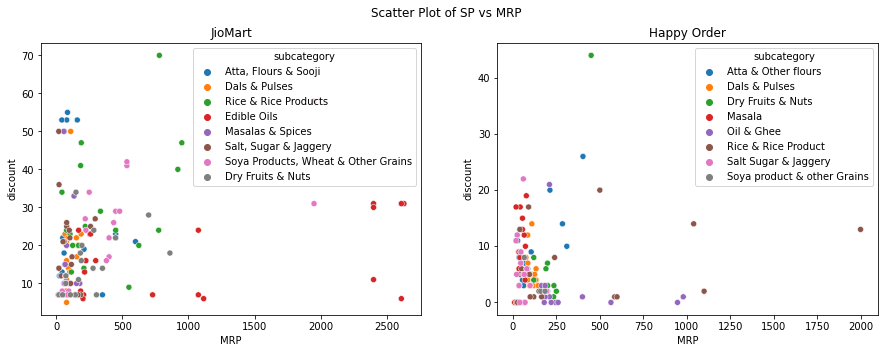

In [47]:
fig2, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(ax=ax1,x = 'MRP', y = 'discount', data = jiomart_staples, hue = 'subcategory')
ax1.set_title('JioMart')
sns.scatterplot(ax = ax2,x = 'MRP',y='discount',data = happyorder_staples, hue=happyorder_staples['subcategory'])
ax2.set_title('Happy Order')
plt.suptitle('Scatter Plot of SP vs MRP')


#### from the plots, we can see that Happy Orders gives a discount on a lot of products under the MRP of 500, but the discounts becomes rare as the MRP increases. We can also see, that most of the discounts are in the 1-10 percent range for these products.
#### Jiomart on the other hand, gives a discount on a lot of items under the MRP of 700, and here, the discounts are not that rare as the MRP increases. We can also see that most of the discounts are in the 1-30 percent range for these products, but higher discounts are not rare. 

### Regression Plots of Discount vs MRP

Text(0.5, 1.0, 'Happy Order')

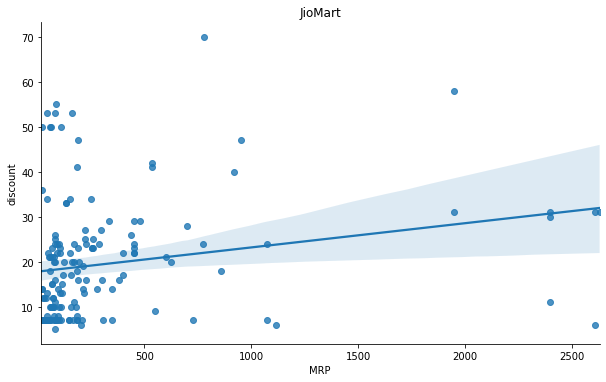

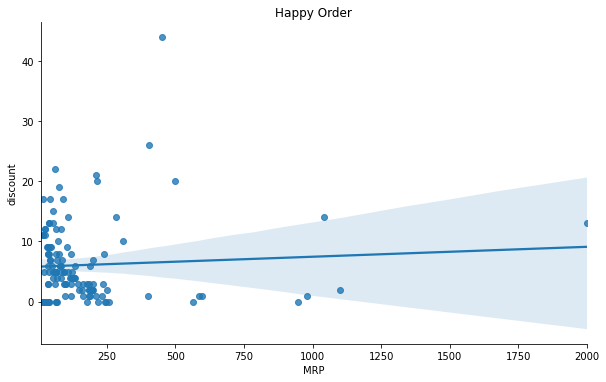

In [48]:
g = sns.lmplot(x = 'MRP',y = 'discount',data = jiomart_staples, aspect = 5/3)
g.ax.set_title('JioMart')
g = sns.lmplot(x = 'MRP',y = 'discount',data = happyorder_staples, aspect = 5/3)
g.ax.set_title('Happy Order')


##### Jiomart has a weak positive correlation between the discount and the MRP, while in the case of HappyOrder, it is close to zero.

## Discounted Items:

### Jiomart

In [49]:
jiomart_staples.sort_values(by='discount', ascending = False).head()

,category,subcategory,brand,name,MRP,SP,discount
43,Staples,Rice & Rice Products,ELINA,Elina Long Grain Rice 5 kg,780.0,229.0,70
79,Staples,Edible Oils,LEONARDO,Leonardo Pomace Olive Oil 5 L,1949.0,1949.0,58
12,Staples,"Atta, Flours & Sooji",PRIVATE LABEL,Rawa 1 kg,86.0,38.0,55
10,Staples,"Atta, Flours & Sooji",PRIVATE LABEL,Besan 1 kg,160.0,74.0,53
11,Staples,"Atta, Flours & Sooji",PRIVATE LABEL,Besan 500 g,80.0,37.0,53


### Happy Orders

In [50]:
happyorder_staples.sort_values(by = 'discount', ascending = False).head()

,category,subcategory,brand,name,MRP,SP,discount
46,Staples,Dry Fruits & Nuts,N/A,Special Walnut - 250 Gms,450,250,44
18,Staples,Atta & Other flours,N/A,Ganesh atta - 10 Kg,403,300,26
125,Staples,Salt Sugar & Jaggery,N/A,MADHUR Crystal Sugar - 1 kg,60,47,22
69,Staples,Oil & Ghee,N/A,Saloni Sarso tel Mustard oil - 1 Kg,210,166,21
0,Staples,Atta & Other flours,N/A,Aashirvaad Atta -Whole Wheat - 5 Kg,213,170,20


## Discounted Items per Subcategory:

### Jiomart

In [51]:
jiomart_staples.sort_values(by='discount', ascending = False).groupby('subcategory').head(1)

,category,subcategory,brand,name,MRP,SP,discount
43,Staples,Rice & Rice Products,ELINA,Elina Long Grain Rice 5 kg,780.0,229.0,70
79,Staples,Edible Oils,LEONARDO,Leonardo Pomace Olive Oil 5 L,1949.0,1949.0,58
12,Staples,"Atta, Flours & Sooji",PRIVATE LABEL,Rawa 1 kg,86.0,38.0,55
90,Staples,Masalas & Spices,VANDEVI,Vandevi Bandhani No 1 Hing Powder 50 g,62.0,31.0,50
39,Staples,Dals & Pulses,GOOD LIFE,Good Life Roasted Skin Chana 500 g,110.0,55.0,50
103,Staples,"Salt, Sugar & Jaggery",GOOD LIFE,Good Life Free Flow Iodised Salt 1 kg,20.0,10.0,50
135,Staples,"Soya Products, Wheat & Other Grains",PICK N COOK,Pick N Cook Premium Lokwan Wheat 10 kg,535.0,305.0,42
153,Staples,Dry Fruits & Nuts,SHREE,Shree Value Pack Black Raisin 250 g,150.0,99.0,34


### Happy Orders

In [52]:
happyorder_staples.sort_values(by='discount', ascending = False).groupby('subcategory').head(1)

,category,subcategory,brand,name,MRP,SP,discount
46,Staples,Dry Fruits & Nuts,N/A,Special Walnut - 250 Gms,450,250,44
18,Staples,Atta & Other flours,N/A,Ganesh atta - 10 Kg,403,300,26
125,Staples,Salt Sugar & Jaggery,N/A,MADHUR Crystal Sugar - 1 kg,60,47,22
69,Staples,Oil & Ghee,N/A,Saloni Sarso tel Mustard oil - 1 Kg,210,166,21
97,Staples,Rice & Rice Product,N/A,BABA SUPER SPECIAL RICE - 10 KG,500,399,20
64,Staples,Masala,N/A,Everest Shahi Biryani Masala - 50 Gms,77,62,19
22,Staples,Dals & Pulses,N/A,Green Whole Moong (Loose) - 1 Kg,109,94,14
129,Staples,Soya product & other Grains,N/A,Nutrela Soya Chunk - 200 Gm,65,60,8
